In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import holidays

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [9]:
df = pd.read_csv("../data/final_tables/composite/composite.csv")
df = df[df['Region']=='erco']
df = df[df['year']<2023]
df["timestamp"] = pd.to_datetime(df["timestamp"])
# Select the country for which you want to check holidays
# us_holidays = holidays.UnitedStates()
# Create a new column in your DataFrame to indicate if a date is a holiday
# df['is_holiday'] = df['timestamp'].apply(lambda x: 1 if x in us_holidays else 0)
# df = df[df['year']<2023]
df

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,Normalized Forecast,temperature,humidity,cloudcover,windspeed,year,month,day_of_week,day,hour,region_id
61369,2016-01-01 00:00:00,34680.0,36278.0,34655.0,erco,-0.870715,-0.711566,9.1,66,95,20.3,2016,1,4,1,0,1
61370,2016-01-01 01:00:00,33846.0,34382.0,33886.0,erco,-0.953776,-0.900394,8.3,64,90,21.9,2016,1,4,1,1,1
61371,2016-01-01 02:00:00,33427.0,34078.0,33469.0,erco,-0.995505,-0.930670,8.1,63,94,21.6,2016,1,4,1,2,1
61372,2016-01-01 03:00:00,33086.0,33807.0,33129.0,erco,-1.029466,-0.957660,7.9,62,93,22.4,2016,1,4,1,3,1
61373,2016-01-01 04:00:00,33048.0,33524.0,33090.0,erco,-1.033251,-0.985844,7.7,60,91,23.9,2016,1,4,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122732,2022-12-31 19:00:00,41852.0,46097.0,41867.0,erco,-0.156435,0.266337,18.3,54,16,13.2,2022,12,5,31,19,1
122733,2022-12-31 20:00:00,41114.0,44529.0,41291.0,erco,-0.229935,0.110175,17.3,58,0,12.9,2022,12,5,31,20,1
122734,2022-12-31 21:00:00,39902.0,42909.0,40582.0,erco,-0.350641,-0.051165,16.6,61,6,14.2,2022,12,5,31,21,1
122735,2022-12-31 22:00:00,38892.0,41633.0,39902.0,erco,-0.451230,-0.178246,16.2,65,3,16.4,2022,12,5,31,22,1


In [10]:
df.columns

Index(['timestamp', 'Demand (MWh)', 'Demand Forecast (MWh)',
       'Net Generation (MWh)', 'Region', 'Normalized Demand',
       'Normalized Forecast', 'temperature', 'humidity', 'cloudcover',
       'windspeed', 'year', 'month', 'day_of_week', 'day', 'hour',
       'region_id'],
      dtype='object')

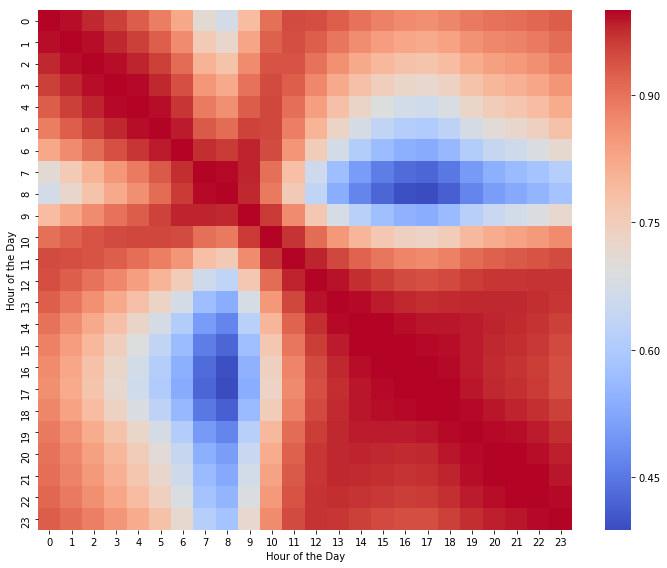

In [11]:
# Prepare a DataFrame to store correlations
correlation_matrix = pd.DataFrame(index=range(24), columns=range(24))

# Calculate correlations
for i in range(24):
    for j in range(24):
        hourly_data_i = df[df['hour'] == i]['Normalized Demand']
        hourly_data_j = df[df['hour'] == j]['Normalized Demand']
        correlation_matrix.loc[i, j] = np.corrcoef(np.array(hourly_data_i), np.array(hourly_data_j))[0,1]

# Convert the correlation matrix to numeric for plotting
correlation_matrix = correlation_matrix.astype(float)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
# plt.title('Hourly Load Value Correlation Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Hour of the Day')
plt.tight_layout()
# plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/hour_correlation_heatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()


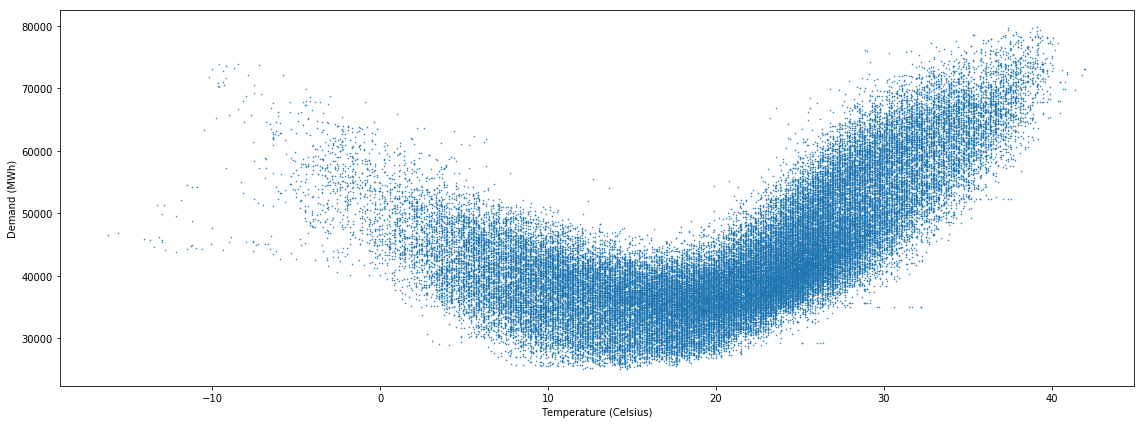

In [17]:
plt.figure(figsize=(16,6))
plt.scatter(df["temperature"], df['Demand (MWh)'], s=0.3)
plt.ylabel('Demand (MWh)')
plt.xlabel('Temperature (Celsius)')
plt.tight_layout()
plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/temperature_demand_scatter.pdf", format="pdf", bbox_inches="tight")
plt.show()

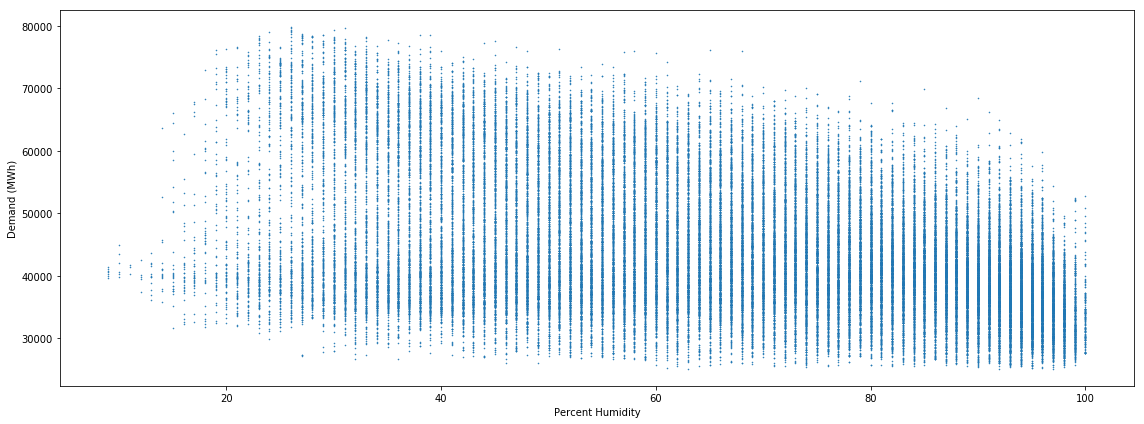

In [18]:
plt.figure(figsize=(16,6))
plt.scatter(df["humidity"], df['Demand (MWh)'], s=0.3)
plt.ylabel('Demand (MWh)')
plt.xlabel('Percent Humidity')
plt.tight_layout()
plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/humidity_demand_scatter.pdf", format="pdf", bbox_inches="tight")
plt.show()

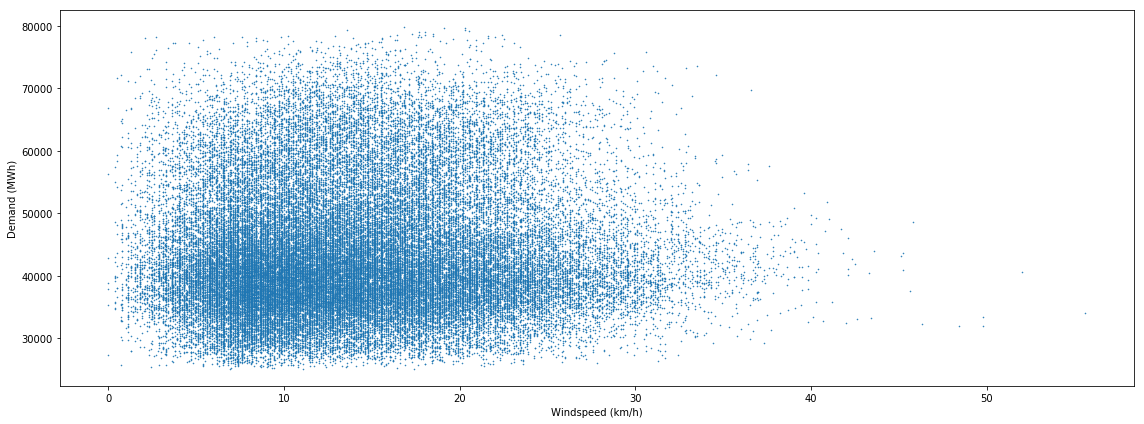

In [19]:
plt.figure(figsize=(16,6))
plt.scatter(df["windspeed"], df['Demand (MWh)'], s=0.3)
plt.ylabel('Demand (MWh)')
plt.xlabel('Windspeed (km/h)')
plt.tight_layout()
plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/windspeed_demand_scatter.pdf", format="pdf", bbox_inches="tight")
plt.show()

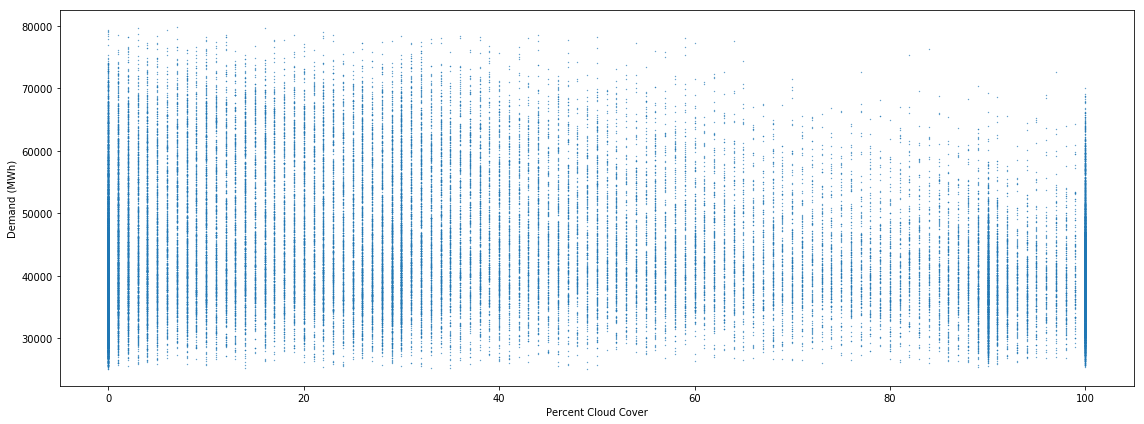

In [20]:
plt.figure(figsize=(16,6))
plt.scatter(df["cloudcover"], df['Demand (MWh)'], s=0.1)
plt.ylabel('Demand (MWh)')
plt.xlabel('Percent Cloud Cover')
plt.tight_layout()
plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/cloudcover_demand_scatter.pdf", format="pdf", bbox_inches="tight")
plt.show()

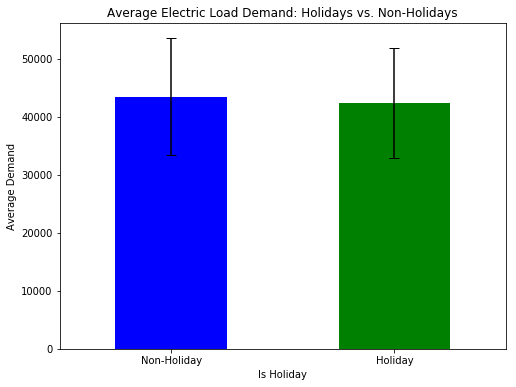

In [29]:
# Group by the holiday status and calculate the average demand and standard deviation
grouped = df.groupby('is_holiday')['Demand (MWh)']
average_demand = grouped.mean()
std_demand = grouped.std()

# Plotting
plt.figure(figsize=(8, 6))
average_demand.plot(kind='bar', yerr=std_demand, color=['blue', 'green'], capsize=5)
plt.title('Average Electric Load Demand: Holidays vs. Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Demand')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

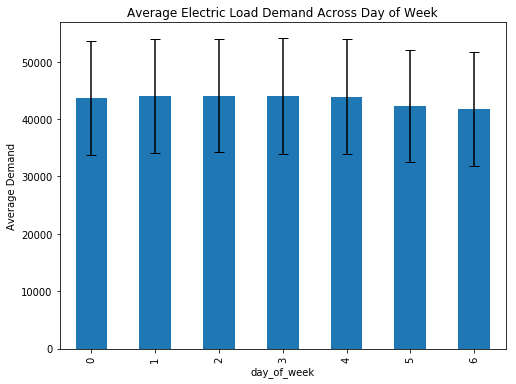

In [9]:
# Group by the holiday status and calculate the average demand and standard deviation
grouped = df.groupby('day_of_week')['Demand (MWh)']
average_demand = grouped.mean()
std_demand = grouped.std()

# Plotting
plt.figure(figsize=(8, 6))
average_demand.plot(kind='bar', yerr=std_demand, capsize=5)
plt.title('Average Electric Load Demand Across Day of Week')
# plt.xlabel('Is Holiday')
plt.ylabel('Average Demand')
# plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

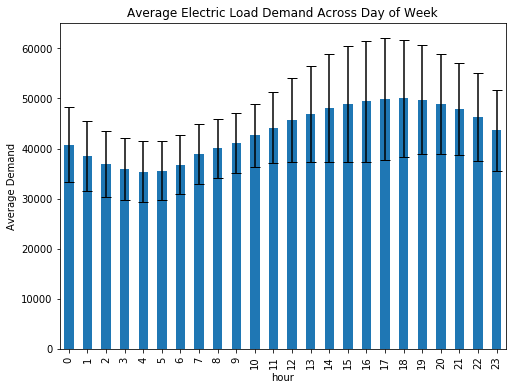

In [10]:
# Group by the holiday status and calculate the average demand and standard deviation
grouped = df.groupby('hour')['Demand (MWh)']
average_demand = grouped.mean()
std_demand = grouped.std()

# Plotting
plt.figure(figsize=(8, 6))
average_demand.plot(kind='bar', yerr=std_demand, capsize=5)
plt.title('Average Electric Load Demand Across Day of Week')
# plt.xlabel('Is Holiday')
plt.ylabel('Average Demand')
# plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

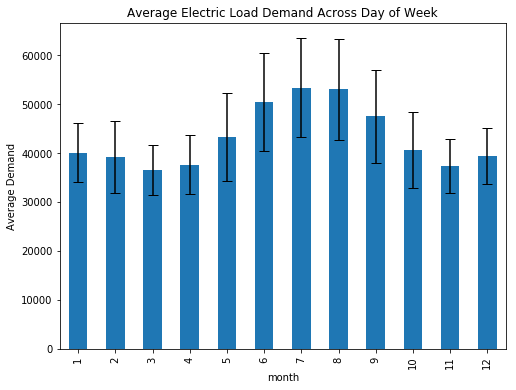

In [11]:
# Group by the holiday status and calculate the average demand and standard deviation
grouped = df.groupby('month')['Demand (MWh)']
average_demand = grouped.mean()
std_demand = grouped.std()

# Plotting
plt.figure(figsize=(8, 6))
average_demand.plot(kind='bar', yerr=std_demand, capsize=5)
plt.title('Average Electric Load Demand Across Day of Week')
# plt.xlabel('Is Holiday')
plt.ylabel('Average Demand')
# plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

In [12]:
df.groupby('is_holiday').head()

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,temperature,humidity,cloudcover,windspeed,day_of_week,hour,month,is_holiday
0,2015-07-01 01:00:00,37456.0,39708.0,37462.0,erco,-0.595484,25.8,85,36,6.1,2,1,7,0
1,2015-07-01 02:00:00,35119.0,37338.0,35124.0,erco,-0.829310,24.9,88,41,4.9,2,2,7,0
2,2015-07-01 03:00:00,33638.0,35697.0,33642.0,erco,-0.977490,24.2,92,36,8.0,2,3,7,0
3,2015-07-01 04:00:00,32798.0,34772.0,32805.0,erco,-1.061535,23.9,93,22,12.6,2,4,7,0
4,2015-07-01 05:00:00,32805.0,34773.0,32812.0,erco,-1.060835,23.8,94,17,13.9,2,5,7,0
47,2015-07-03 00:00:00,43307.0,45108.0,43555.0,erco,-0.010069,27.7,75,21,12.0,4,0,7,1
48,2015-07-03 01:00:00,40173.0,39971.0,40177.0,erco,-0.323638,27.3,76,28,13.1,4,1,7,1
49,2015-07-03 02:00:00,37954.0,37656.0,37958.0,erco,-0.545657,26.5,77,15,12.9,4,2,7,1
50,2015-07-03 03:00:00,36353.0,35803.0,36358.0,erco,-0.705844,26.0,79,21,12.8,4,3,7,1
51,2015-07-03 04:00:00,35346.0,34716.0,35352.0,erco,-0.806598,25.5,81,28,12.0,4,4,7,1


In [13]:
start=45000
df[start:start+240]

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,temperature,humidity,cloudcover,windspeed,day_of_week,hour,month,is_holiday
45000,2020-08-18 01:00:00,45756.0,47779.0,45752.0,erco,0.234963,33.4,27,24,9.9,1,1,8,0
45001,2020-08-18 02:00:00,43247.0,44918.0,43247.0,erco,-0.016072,32.1,31,14,6.6,1,2,8,0
45002,2020-08-18 03:00:00,41545.0,43022.0,41546.0,erco,-0.186364,31.2,34,14,7.3,1,3,8,0
45003,2020-08-18 04:00:00,40414.0,41883.0,40415.0,erco,-0.299525,30.3,38,7,5.9,1,4,8,0
45004,2020-08-18 05:00:00,40169.0,41396.0,40186.0,erco,-0.324038,29.8,40,3,8.3,1,5,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45235,2020-08-27 20:00:00,64040.0,62772.0,63726.0,erco,2.064348,35.1,42,16,5.6,3,20,8,0
45236,2020-08-27 21:00:00,61926.0,61041.0,61557.0,erco,1.852835,35.6,40,19,5.9,3,21,8,0
45237,2020-08-27 22:00:00,59008.0,58267.0,58639.0,erco,1.560877,35.1,41,41,9.8,3,22,8,0
45238,2020-08-27 23:00:00,55121.0,54576.0,54944.0,erco,1.171968,32.7,50,28,11.0,3,23,8,0


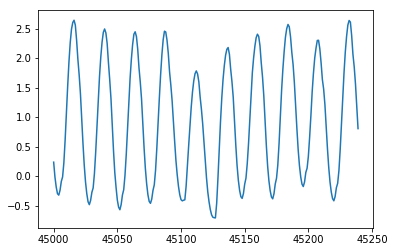

In [14]:
plt.plot(df['Normalized Demand'][start:start+240])

In [15]:
np.min(df['Normalized Demand']), np.max(df['Normalized Demand']), np.std(df['Normalized Demand'])

(-1.865468080157889, 3.000152451712088, 0.9999923993387386)